In [13]:
## load basic tools
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load data
data = pd.read_csv('../DatasetForML.csv')
data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,price_category
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,1,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,1,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,1,0,0,1


<Axes: >

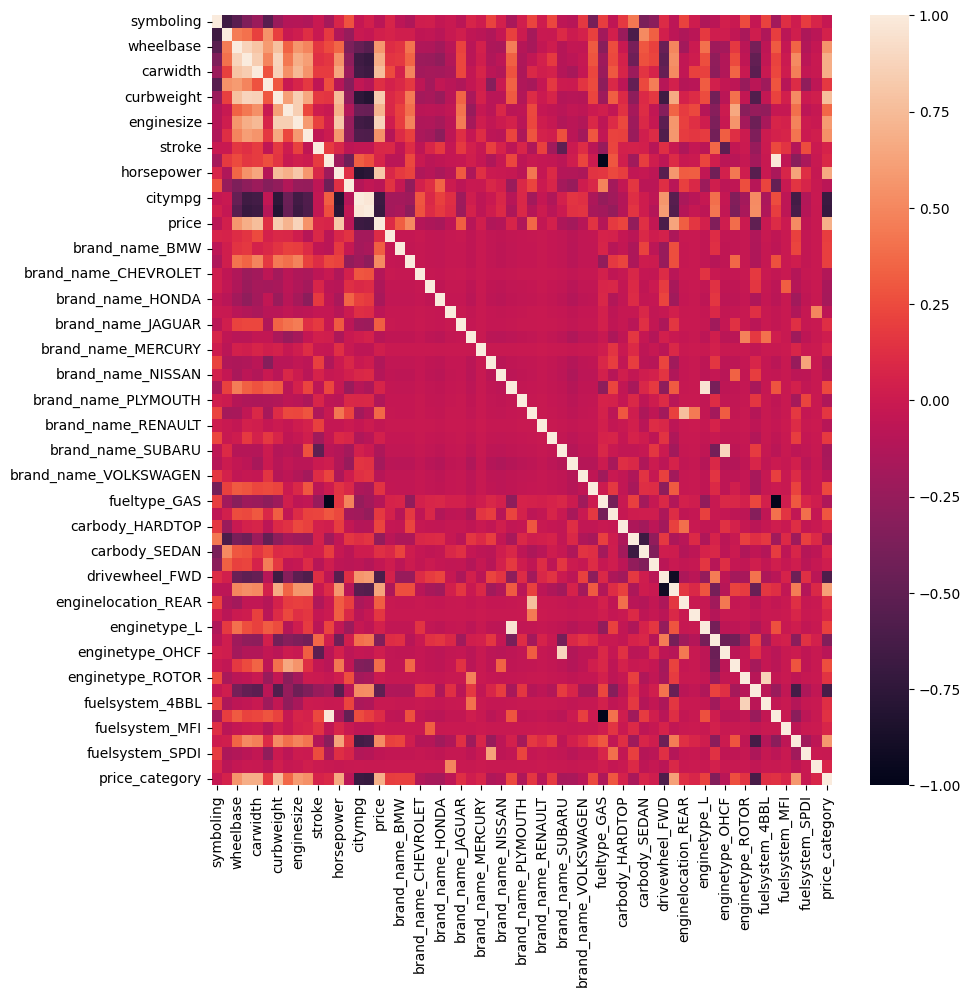

In [57]:
# correlation matrix with all the variables
corr= data.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr)

<Axes: >

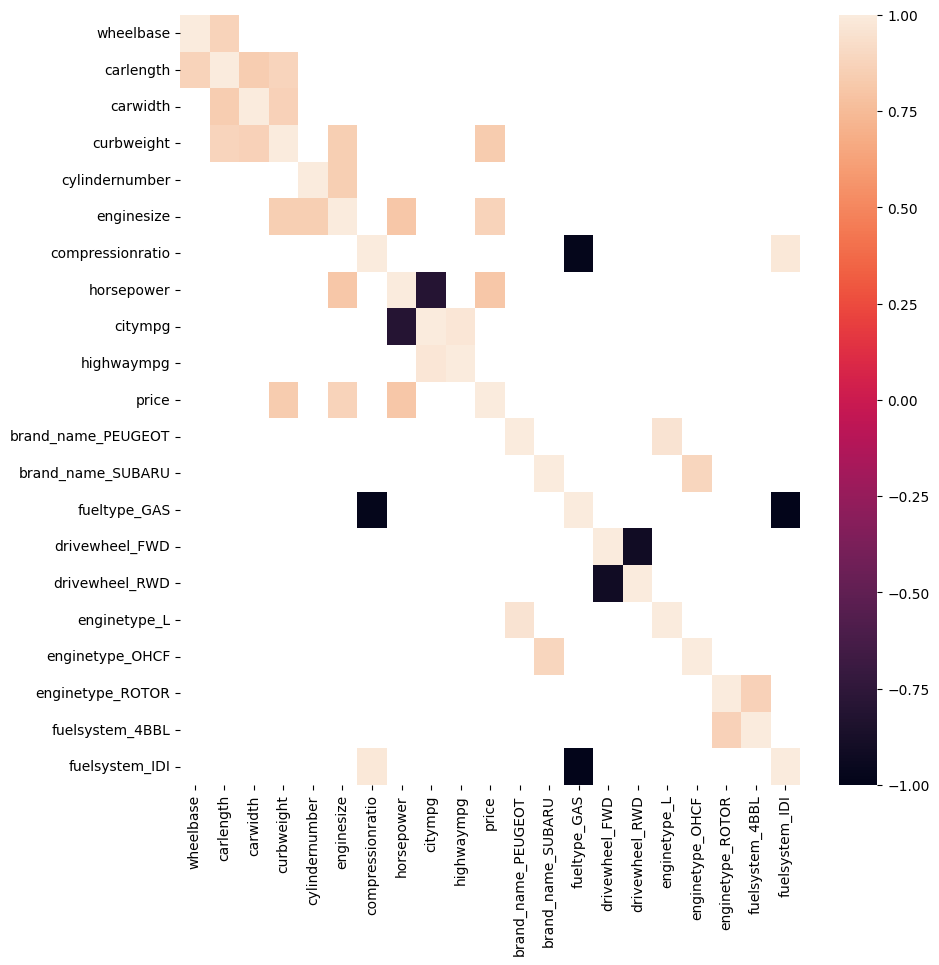

In [15]:
# Correlation matrix filtered by correlation coefficient > 0.8 (absolute)

corr= data.corr()
max_corr = (abs(corr) >= 0.8)
sup_filter = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_filtered = corr[max_corr]
corr_filtered = corr_filtered.dropna(thresh=2).dropna(axis=1, how='all')
plt.figure(figsize=(10,10))

sns.heatmap(corr_filtered)

In [16]:
# looking for the best variables correlated with the target (price)
corr_filtered.loc['price',:]

wheelbase                  NaN
carlength                  NaN
carwidth                   NaN
curbweight            0.835305
cylindernumber             NaN
enginesize            0.874145
compressionratio           NaN
horsepower            0.808139
citympg                    NaN
highwaympg                 NaN
price                 1.000000
brand_name_PEUGEOT         NaN
brand_name_SUBARU          NaN
fueltype_GAS               NaN
drivewheel_FWD             NaN
drivewheel_RWD             NaN
enginetype_L               NaN
enginetype_OHCF            NaN
enginetype_ROTOR           NaN
fuelsystem_4BBL            NaN
fuelsystem_IDI             NaN
Name: price, dtype: float64

In [17]:
# first we will explore regressions using all the variables 
X = data[[x for x in data.columns if x not in ['price', 'price_category']]]
y= data['price']

In [18]:
# spliting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 59)
(41, 59)
(164,)
(41,)


In [19]:
# here we try pipelines for the most common regressors with a standarscaler processing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

pipeline_lr = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
pipeline_rg = Pipeline([('scaler', StandardScaler()), ('model', RidgeCV())])
pipeline_la = Pipeline([('scaler', StandardScaler()), ('model', LassoCV())])
pipeline_el = Pipeline([('scaler', StandardScaler()), ('model', ElasticNet())])
pipeline_svr = Pipeline([('scaler', StandardScaler()), ('model', SVR())])
pipeline_kn = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

pipelines = [pipeline_lr, pipeline_el, pipeline_kn, pipeline_la, pipeline_svr, pipeline_rg]

pip_dict = {0: 'Linear Regression', 1: 'Elastic Net', 2: 'KNN', 3: 'Lasso', 4: 'SVR', 5: 'Ridge'}

r2 = []

for i, pipe in enumerate(pipelines):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    _r2 = r2_score(y_test, y_pred)
    r2.append(_r2)
    print(f'Finalized model {pip_dict[i]} with R_2 score: {_r2}')

best_model_idx = r2.index(max(r2))
print(f'Best model: {pip_dict[best_model_idx]}')


Finalized model Linear Regression with R_2 score: 0.8447362552578018
Finalized model Elastic Net with R_2 score: 0.881240850532323
Finalized model KNN with R_2 score: 0.6983285080288437
Finalized model Lasso with R_2 score: 0.863150756725402
Finalized model SVR with R_2 score: -0.10435495883756962
Finalized model Ridge with R_2 score: 0.8812294611279996
Best model: Elastic Net


In [20]:
# here we try pipelines for the most common regressors with a MinMaxScaler processing
from sklearn.preprocessing import MinMaxScaler

pipeline_lr = Pipeline([('scaler', MinMaxScaler()), ('model', LinearRegression())])
pipeline_rg = Pipeline([('scaler', MinMaxScaler()), ('model', RidgeCV())])
pipeline_la = Pipeline([('scaler', MinMaxScaler()), ('model', LassoCV())])
pipeline_el = Pipeline([('scaler', MinMaxScaler()), ('model', ElasticNet())])
pipeline_svr = Pipeline([('scaler', MinMaxScaler()), ('model', SVR())])
pipeline_kn = Pipeline([('scaler', MinMaxScaler()), ('model', KNeighborsRegressor())])

pipelines = [pipeline_lr, pipeline_el, pipeline_kn, pipeline_la, pipeline_svr, pipeline_rg]

pip_dict = {0: 'Linear Regression', 1: 'Elastic Net', 2: 'KNN', 3: 'Lasso', 4: 'SVR', 5: 'Ridge'}

r2 = []

for i, pipe in enumerate(pipelines):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    _r2 = r2_score(y_test, y_pred)
    r2.append(_r2)
    print(f'Finalized model {pip_dict[i]} with R_2 score: {_r2}')

best_model_idx = r2.index(max(r2))
print(f'Best model: {pip_dict[best_model_idx]}')

Finalized model Linear Regression with R_2 score: 0.8447415984556481


Finalized model Elastic Net with R_2 score: 0.5502175257411736
Finalized model KNN with R_2 score: 0.7889352069711916
Finalized model Lasso with R_2 score: 0.8646976250502174
Finalized model SVR with R_2 score: -0.1037165861705962
Finalized model Ridge with R_2 score: 0.860076628591375
Best model: Lasso


In [21]:
# here we try pipelines for the most common regressors without a scaling
pipeline_lr = Pipeline([('model', LinearRegression())])
pipeline_rg = Pipeline([('model', RidgeCV())])
pipeline_la = Pipeline([('model', LassoCV())])
pipeline_el = Pipeline([('model', ElasticNet())])
pipeline_svr = Pipeline([('model', SVR())])
pipeline_kn = Pipeline([('model', KNeighborsRegressor())])

pipelines = [pipeline_lr, pipeline_el, pipeline_kn, pipeline_la, pipeline_svr, pipeline_rg]

pip_dict = {0: 'Linear Regression', 1: 'Elastic Net', 2: 'KNN', 3: 'Lasso', 4: 'SVR', 5: 'Ridge'}

r2 = []

for i, pipe in enumerate(pipelines):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    _r2 = r2_score(y_test, y_pred)
    r2.append(_r2)
    print(f'Finalized model {pip_dict[i]} with R_2 score: {_r2}')

best_model_idx = r2.index(max(r2))
print(f'Best model: {pip_dict[best_model_idx]}')

Finalized model Linear Regression with R_2 score: 0.8447415984556277
Finalized model Elastic Net with R_2 score: 0.8182011639173224
Finalized model KNN with R_2 score: 0.7474814137115056
Finalized model Lasso with R_2 score: 0.757837773621763
Finalized model SVR with R_2 score: -0.10602933948458948
Finalized model Ridge with R_2 score: 0.8559993527731615
Best model: Ridge


In [22]:
# here we try pipelines for the most common regressors with a minmax scaling and PCA decomposition
from sklearn.decomposition import PCA

pca_scores = {}
for j in range(1,10):
    pipeline_lr = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA(n_components=j)), ('model', LinearRegression())])
    pipeline_rg = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA(n_components=j)), ('model', RidgeCV())])
    pipeline_la = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA(n_components=j)), ('model', LassoCV())])
    pipeline_el = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA(n_components=j)), ('model', ElasticNet())])
    pipeline_svr = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA(n_components=j)), ('model', SVR())])
    pipeline_kn = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA(n_components=j)), ('model', KNeighborsRegressor())])

    pipelines = [pipeline_lr, pipeline_el, pipeline_kn, pipeline_la, pipeline_svr, pipeline_rg]

    pip_dict = {0: 'Linear Regression', 1: 'Elastic Net', 2: 'KNN', 3: 'Lasso', 4: 'SVR', 5: 'Ridge'}

    r2 = []

    print(f'***{j} PCA COMPONENTS***')

    for i, pipe in enumerate(pipelines):
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        _r2 = r2_score(y_test, y_pred)
        r2.append(_r2)
        print(f'Finalized model {pip_dict[i]} with R_2 score: {_r2}')

    best_model_idx = r2.index(max(r2))
    print(f'Best model: {pip_dict[best_model_idx]}')
    best_model_score = r2[best_model_idx]

    pca_scores[j]= [best_model_idx, best_model_score]

pca_max_score = 0
pca_max_score_idx = 0
for i, model in pca_scores.items():
    if model[1] > pca_max_score:
        pca_max_score = model[1]
        pca_max_score_idx = i

print(f'Best model is: Number of PCA components: {i}, model: {pip_dict[pca_scores[pca_max_score_idx][0]]}, score: {pca_max_score} ')

***1 PCA COMPONENTS***
Finalized model Linear Regression with R_2 score: 0.5430634196026076
Finalized model Elastic Net with R_2 score: 0.46161195637156127
Finalized model KNN with R_2 score: 0.6448943674071924
Finalized model Lasso with R_2 score: 0.5429961365210005
Finalized model SVR with R_2 score: -0.09666945965769447
Finalized model Ridge with R_2 score: 0.5426110692161314
Best model: KNN
***2 PCA COMPONENTS***
Finalized model Linear Regression with R_2 score: 0.5680242778787965
Finalized model Elastic Net with R_2 score: 0.4754183820623511
Finalized model KNN with R_2 score: 0.5767685061681784
Finalized model Lasso with R_2 score: 0.5675196357460222
Finalized model SVR with R_2 score: -0.09990120092735677
Finalized model Ridge with R_2 score: 0.5673318347105616
Best model: KNN
***3 PCA COMPONENTS***
Finalized model Linear Regression with R_2 score: 0.5684171114659605
Finalized model Elastic Net with R_2 score: 0.475892842394921
Finalized model KNN with R_2 score: 0.5925001149737

In [23]:
# here we try pipelines for the most common regressors with a standard scaling and PCA decomposition
pca_scores = {}
for j in range(1,10):
    pipeline_lr = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=j)), ('model', LinearRegression())])
    pipeline_rg = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=j)), ('model', RidgeCV())])
    pipeline_la = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=j)), ('model', LassoCV())])
    pipeline_el = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=j)), ('model', ElasticNet())])
    pipeline_svr = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=j)), ('model', SVR())])
    pipeline_kn = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=j)), ('model', KNeighborsRegressor())])

    pipelines = [pipeline_lr, pipeline_el, pipeline_kn, pipeline_la, pipeline_svr, pipeline_rg]

    pip_dict = {0: 'Linear Regression', 1: 'Elastic Net', 2: 'KNN', 3: 'Lasso', 4: 'SVR', 5: 'Ridge'}

    r2 = []

    print(f'***{j} PCA COMPONENTS***')

    for i, pipe in enumerate(pipelines):
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        _r2 = r2_score(y_test, y_pred)
        r2.append(_r2)
        print(f'Finalized model {pip_dict[i]} with R_2 score: {_r2}')

    best_model_idx = r2.index(max(r2))
    print(f'Best model: {pip_dict[best_model_idx]}')
    best_model_score = r2[best_model_idx]

    pca_scores[j]= [best_model_idx, best_model_score]

pca_max_score = 0
pca_max_score_idx = 0
for i, model in pca_scores.items():
    if model[1] > pca_max_score:
        pca_max_score = model[1]
        pca_max_score_idx = i

print(f'Best model is: Number of PCA components: {i}, model: {pip_dict[pca_scores[pca_max_score_idx][0]]}, score: {pca_max_score} ')

***1 PCA COMPONENTS***
Finalized model Linear Regression with R_2 score: 0.6884521427025629
Finalized model Elastic Net with R_2 score: 0.6791424521789599
Finalized model KNN with R_2 score: 0.6926892746628934
Finalized model Lasso with R_2 score: 0.688269007853087
Finalized model SVR with R_2 score: -0.09789946235776426
Finalized model Ridge with R_2 score: 0.6884415887503168
Best model: KNN
***2 PCA COMPONENTS***
Finalized model Linear Regression with R_2 score: 0.7638197249602064
Finalized model Elastic Net with R_2 score: 0.7521555867799744
Finalized model KNN with R_2 score: 0.8214062957718871
Finalized model Lasso with R_2 score: 0.763411629346272
Finalized model SVR with R_2 score: -0.10007746583002075
Finalized model Ridge with R_2 score: 0.7636870794841327
Best model: KNN
***3 PCA COMPONENTS***
Finalized model Linear Regression with R_2 score: 0.7739752893808763
Finalized model Elastic Net with R_2 score: 0.762999211608383
Finalized model KNN with R_2 score: 0.8357653494707182

Conclusion:  
Best model is Elastic Net with R^2 score: 0.881240850532323, scaler: StandarScaler, without PCA

In [24]:
## lets try to optimize ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV

# define search space
param_grid = {
    'elasticnetcv__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
    'elasticnetcv__eps': [1e-3, 1e-4, 1e-5],
    'elasticnetcv__n_alphas': [50, 100, 200],
    'elasticnetcv__alphas': [[0.01, 0.1, 1.0], [0.001, 0.01, 0.1], [0.0001, 0.001, 0.01]]
}

# create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnetcv', ElasticNetCV())
])

# create gridsearch object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='r2', cv=5, verbose= 2)

# fit gridsearch
grid_search.fit(X_train, y_train)

# print best hyperparameters
print("Best hyperparameters found:")
print(grid_search.best_params_)

# obtain best model
best_model = grid_search.best_estimator_

# Evaluate best model against test set
y_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(f'R^2 in the test set: {r2_test}')


Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END elasticnetcv__alphas=[0.01, 0.1, 1.0], elasticnetcv__eps=0.001, elasticnetcv__l1_ratio=0.1, elasticnetcv__n_alphas=50; total time=   0.0s
[CV] END elasticnetcv__alphas=[0.01, 0.1, 1.0], elasticnetcv__eps=0.001, elasticnetcv__l1_ratio=0.1, elasticnetcv__n_alphas=50; total time=   0.0s
[CV] END elasticnetcv__alphas=[0.01, 0.1, 1.0], elasticnetcv__eps=0.001, elasticnetcv__l1_ratio=0.1, elasticnetcv__n_alphas=50; total time=   0.0s
[CV] END elasticnetcv__alphas=[0.01, 0.1, 1.0], elasticnetcv__eps=0.001, elasticnetcv__l1_ratio=0.1, elasticnetcv__n_alphas=50; total time=   0.0s
[CV] END elasticnetcv__alphas=[0.01, 0.1, 1.0], elasticnetcv__eps=0.001, elasticnetcv__l1_ratio=0.1, elasticnetcv__n_alphas=50; total time=   0.0s
[CV] END elasticnetcv__alphas=[0.01, 0.1, 1.0], elasticnetcv__eps=0.001, elasticnetcv__l1_ratio=0.1, elasticnetcv__n_alphas=100; total time=   0.0s
[CV] END elasticnetcv__alphas=[0.01, 0.1, 1.0], elasti

In [25]:
best_params = {'alphas': [0.01, 0.1, 1.0], 'eps': 0.001, 'l1_ratio': 0.99, 'n_alphas': 50}

pipeline = Pipeline([('scaler', StandardScaler()), ('elasticnetcv', ElasticNetCV(**best_params))])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

score = r2_score(y_test, y_pred)

print(score)


0.8572481164489042


In [26]:
#here we obtain only one PCA component in order to visualize the predictions
pca = PCA(n_components=1)
pca.fit(X_train)
x_test_pca = pca.transform(X_test)

x_test_pca.reshape(-1)


array([ -344.02795734,  -241.53510763,  -794.8995672 ,  -508.36679165,
         619.29191653,   278.11675904,   -22.26210251,  -556.64880071,
         588.09017571,   133.36432311,  -686.10993025,  -525.28755414,
         -10.80327113,   146.35604584,  -508.25266571,  -203.68643815,
        -717.63881375,   406.27715302,  -230.04297878,   198.14134858,
        -379.23738553,  -198.32734602,   112.80691925,  1307.77810409,
        -123.45771514,   270.00172086,   -85.99808275,   177.86375566,
        -209.11027836,  -101.71937593,  -623.81136657,  1038.46161606,
       -1037.73920352,   -81.12056978,  -207.94973829,   243.03046639,
         211.00193027,  -432.18718783,   286.54051546,  -499.76292425,
        -332.75254755])

In [27]:
y_pred

array([ 8575.64912981,  9103.26919445,  5765.09467117, 19835.82324193,
       11171.37056047, 16103.52972957, 21157.05836445,  6383.9567289 ,
        9257.02655384,  9084.88593998,  5707.61483028,  5383.74060883,
        5656.87432506, 10521.84640666,  6572.13971766,  7807.68688803,
        6227.62263622, 16239.97047515,  7565.32229295, 10412.96012461,
        9207.90908013,  8928.0460255 , 11826.23884449, 35307.63286037,
       14064.36324045, 18396.8033694 ,  9691.42386473, 18297.80619412,
       11595.28484169,  8003.19173719, 11446.05369972, 16739.2389172 ,
        9617.01694947,  8669.86594508, 37407.87443891, 10495.39006266,
       22316.07581007, 10082.35604253, 13915.228113  ,  8905.34980704,
        5737.61598652])

Text(0.5, 0, 'PCA component 1')

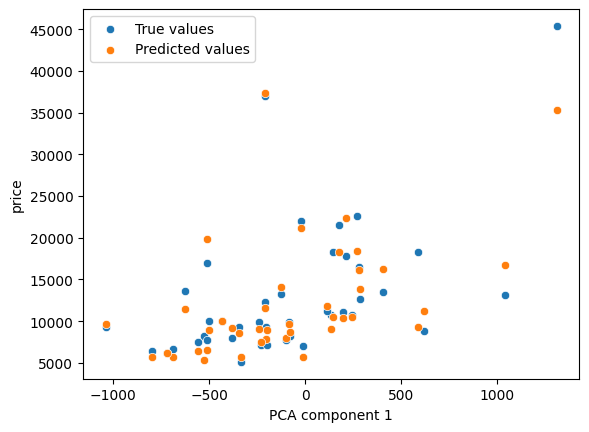

In [28]:
sns.scatterplot(x=x_test_pca.reshape(-1), y=y_test, label= 'True values')
sns.scatterplot(x=x_test_pca.reshape(-1), y=y_pred, label= 'Predicted values')
plt.xlabel('PCA component 1')

In [29]:
# now we try adding polinomial features
from sklearn.preprocessing import PolynomialFeatures

scores= []

for i in range(2,4):

    best_params = {'alphas': [0.01, 0.1, 1.0], 'eps': 0.001, 'l1_ratio': 0.99, 'n_alphas': 50}

    polinomial_degree = i

    pipeline = Pipeline([('scaler', StandardScaler()), ('pol_features', PolynomialFeatures(degree=polinomial_degree)) ,('elasticnetcv', ElasticNetCV(**best_params))])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    score = r2_score(y_test, y_pred)
    scores.append(score)

    print(f'Plinomial degree: {i}, R^2 score: {score}')

Plinomial degree: 2, R^2 score: 0.8703210110245018
Plinomial degree: 3, R^2 score: 0.8970197924236055


Summary:  
Elastic net performs well, and polinomial features of 3rd degree improve the performance.  
Best R^2 Score: 0.8970197924236055  
Best hyperparameters: {'alphas': [0.01, 0.1, 1.0], 'eps': 0.001, 'l1_ratio': 0.99, 'n_alphas': 50}  
Scaling: Standarscaler   
Polinomial features: 3rd degree

In [30]:
# lets try decission tree regressor, with standarscaler and without polinomial features.
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([('scaler', StandardScaler()), ('dec_tree', DecisionTreeRegressor())])

p_grid ={
    'dec_tree__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'dec_tree__max_depth': [i for i in range(2,10)],
    'dec_tree__min_samples_split': [i for i in range(2,8)],
    'dec_tree__min_samples_leaf': [i for i in range(5)],
    'dec_tree__max_features': [None, 'sqrt', 'log2']
}

g_search = GridSearchCV(pipeline, p_grid, cv=5, verbose=2 )

g_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(g_search.best_params_)

best_model = g_search.best_estimator_

y_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(f'R^2 en el conjunto de prueba: {r2_test}')

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
[CV] END dec_tree__criterion=squared_error, dec_tree__max_depth=2, dec_tree__max_features=None, dec_tree__min_samples_leaf=0, dec_tree__min_samples_split=2; total time=   0.0s
[CV] END dec_tree__criterion=squared_error, dec_tree__max_depth=2, dec_tree__max_features=None, dec_tree__min_samples_leaf=0, dec_tree__min_samples_split=2; total time=   0.0s
[CV] END dec_tree__criterion=squared_error, dec_tree__max_depth=2, dec_tree__max_features=None, dec_tree__min_samples_leaf=0, dec_tree__min_samples_split=2; total time=   0.0s
[CV] END dec_tree__criterion=squared_error, dec_tree__max_depth=2, dec_tree__max_features=None, dec_tree__min_samples_leaf=0, dec_tree__min_samples_split=2; total time=   0.0s
[CV] END dec_tree__criterion=squared_error, dec_tree__max_depth=2, dec_tree__max_features=None, dec_tree__min_samples_leaf=0, dec_tree__min_samples_split=2; total time=   0.0s
[CV] END dec_tree__criterion=squared_error, dec_tree__

Decission Tree Regressor has a good performance, but it is not better than ElasticNet.

In [31]:
# Now we are going to try using only the most correlated features.
corr_features = list(corr_filtered.loc['price',:].dropna().drop('price').index)
corr_features

['curbweight', 'enginesize', 'horsepower']

In [32]:
data[corr_features]

,curbweight,enginesize,horsepower
0,2548,130,111
1,2548,130,111
2,2823,152,154
3,2337,109,102
4,2824,136,115
...,...,...,...
200,2952,141,114
201,3049,141,160
202,3012,173,134
203,3217,145,106


In [70]:
X_red = data[corr_features]

X_red_train, X_red_test, y_train, y_test = train_test_split(X_red, y, test_size=0.2, random_state=639)

In [71]:
X_red.head()

,curbweight,enginesize,horsepower
0,2548,130,111
1,2548,130,111
2,2823,152,154
3,2337,109,102
4,2824,136,115


In [35]:
from xgboost import XGBRegressor

In [37]:
from catboost import CatBoostRegressor

In [72]:
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
pipeline_rg = Pipeline([('scaler', StandardScaler()), ('model', RidgeCV())])
pipeline_la = Pipeline([('scaler', StandardScaler()), ('model', LassoCV())])
pipeline_el = Pipeline([('scaler', StandardScaler()), ('model', ElasticNetCV())])
pipeline_svr = Pipeline([('scaler', StandardScaler()), ('model', SVR())])
pipeline_kn = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())])
pipeline_dt = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeRegressor())])
pipeline_XGB = Pipeline([('scaler', StandardScaler()), ('model', XGBRegressor())])
pipeline_cb = Pipeline([('scaler', StandardScaler()), ('model', CatBoostRegressor())])

pipelines = [pipeline_lr, pipeline_el, pipeline_kn, pipeline_la, pipeline_svr, pipeline_rg, pipeline_dt, pipeline_XGB, pipeline_cb]

pip_dict = {0: 'Linear Regression', 1: 'Elastic Net', 2: 'KNN', 3: 'Lasso', 4: 'SVR', 5: 'Ridge', 6: 'Decission Tree', 7: 'XGBoost', 8: 'Catboost'}

r2 = []

for i, pipe in enumerate(pipelines):
    pipe.fit(X_red_train, y_train)
    y_pred = pipe.predict(X_red_test)
    _r2 = r2_score(y_test, y_pred)
    r2.append(_r2)
    print(f'Finalized model {pip_dict[i]} with R_2 score: {_r2}')

best_model_idx = r2.index(max(r2))
print(f'Best model: {pip_dict[best_model_idx]}')

Finalized model Linear Regression with R_2 score: 0.7201462045418214
Finalized model Elastic Net with R_2 score: 0.41266196755816964
Finalized model KNN with R_2 score: 0.8901546315223559
Finalized model Lasso with R_2 score: 0.7260221024797087
Finalized model SVR with R_2 score: -0.1086553581512466
Finalized model Ridge with R_2 score: 0.7293725591323632
Finalized model Decission Tree with R_2 score: 0.84130983404041
Finalized model XGBoost with R_2 score: 0.8801870842430489
Learning rate set to 0.03077
0:	learn: 8044.6766461	total: 1.11ms	remaining: 1.11s
1:	learn: 7886.5988709	total: 2.2ms	remaining: 1.1s
2:	learn: 7703.2693752	total: 3.26ms	remaining: 1.08s
3:	learn: 7539.8151298	total: 4.11ms	remaining: 1.02s
4:	learn: 7402.3861387	total: 4.82ms	remaining: 958ms
5:	learn: 7246.2728472	total: 5.42ms	remaining: 899ms
6:	learn: 7113.0876164	total: 5.98ms	remaining: 849ms
7:	learn: 6977.8995061	total: 6.57ms	remaining: 814ms
8:	learn: 6854.3693692	total: 7.17ms	remaining: 789ms
9:	lea

We can see that catboost, with default hyperparameters, has the best performance.

In [73]:
# lets optimize catboost hyperparameters with optuna.
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_red_train, y_train)
    y_pred = model.predict(X_red_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

In [74]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-01-20 15:52:19,778] A new study created in memory with name: no-name-c25becc1-8025-483b-9708-2b11dd45f81b
[I 2024-01-20 15:52:20,154] Trial 0 finished with value: 2046.3281030885587 and parameters: {'learning_rate': 0.04726340143365248, 'depth': 3, 'subsample': 0.4770721400067063, 'colsample_bylevel': 0.6955519444779812, 'min_data_in_leaf': 4}. Best is trial 0 with value: 2046.3281030885587.
[I 2024-01-20 15:52:21,061] Trial 1 finished with value: 2058.8124330048076 and parameters: {'learning_rate': 0.06347030446344215, 'depth': 9, 'subsample': 0.5497236652758494, 'colsample_bylevel': 0.43891842753178184, 'min_data_in_leaf': 9}. Best is trial 0 with value: 2046.3281030885587.
[I 2024-01-20 15:52:25,860] Trial 2 finished with value: 2079.733392998745 and parameters: {'learning_rate': 0.004255844645266614, 'depth': 10, 'subsample': 0.604682113733778, 'colsample_bylevel': 0.9610248397897895, 'min_data_in_leaf': 94}. Best is trial 0 with value: 2046.3281030885587.
[I 2024-01-20 15:

In [75]:
best_params = study.best_params
best_model = CatBoostRegressor(**best_params)

best_model.fit(X_red_train, y_train)
y_pred = best_model.predict(X_red_test)

best_score = r2_score(y_test, y_pred)

0:	learn: 7878.8656863	total: 667us	remaining: 667ms
1:	learn: 7600.8625950	total: 1.22ms	remaining: 609ms
2:	learn: 7278.8481546	total: 1.75ms	remaining: 582ms
3:	learn: 6990.8320921	total: 2.46ms	remaining: 613ms
4:	learn: 6740.2478538	total: 2.98ms	remaining: 592ms
5:	learn: 6522.9787362	total: 3.45ms	remaining: 572ms
6:	learn: 6266.0785852	total: 3.98ms	remaining: 565ms
7:	learn: 6072.2122094	total: 4.45ms	remaining: 552ms
8:	learn: 5877.9357298	total: 4.84ms	remaining: 533ms
9:	learn: 5686.1128817	total: 5.33ms	remaining: 527ms
10:	learn: 5507.6371420	total: 5.79ms	remaining: 520ms
11:	learn: 5366.8161447	total: 6.24ms	remaining: 514ms
12:	learn: 5205.8489223	total: 6.71ms	remaining: 510ms
13:	learn: 5056.7699955	total: 7.24ms	remaining: 510ms
14:	learn: 4916.5807248	total: 7.72ms	remaining: 507ms
15:	learn: 4795.8509381	total: 8.07ms	remaining: 496ms
16:	learn: 4678.1691310	total: 8.59ms	remaining: 497ms
17:	learn: 4542.7401354	total: 9.5ms	remaining: 518ms
18:	learn: 4419.520387

In [76]:
print(f'Best model is Catboost')
print(f'Hyperparameters: {best_params}')
print(f'R^2 score: {best_score}')

Best model is Catboost
Hyperparameters: {'learning_rate': 0.06916623777071992, 'depth': 6, 'subsample': 0.05773845817555169, 'colsample_bylevel': 0.8928937439525925, 'min_data_in_leaf': 24}
R^2 score: 0.9311628720913862


In [47]:
X_red_test.head()

,curbweight,enginesize,horsepower
103,3060,181,152
158,2275,110,56
73,3900,308,184
181,3151,161,156
116,3252,152,95


<Axes: xlabel='curbweight', ylabel='price'>

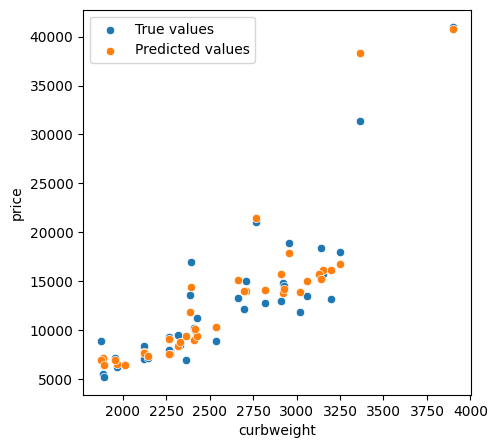

In [77]:
plt.figure(figsize=(5,5))

sns.scatterplot(x=X_red_test['curbweight'], y= y_test, label= 'True values')
sns.scatterplot(x=X_red_test['curbweight'], y= y_pred, label= 'Predicted values')

<Axes: xlabel='enginesize', ylabel='price'>

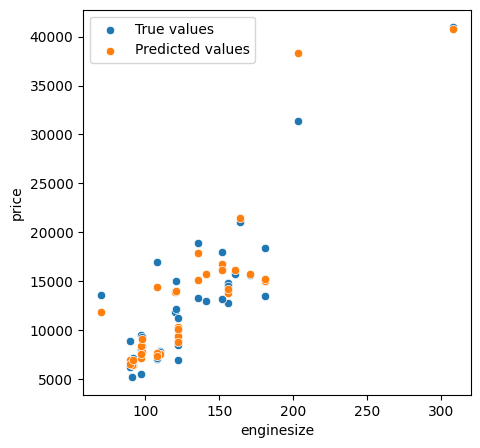

In [78]:
plt.figure(figsize=(5,5))

sns.scatterplot(x=X_red_test['enginesize'], y= y_test, label= 'True values')
sns.scatterplot(x=X_red_test['enginesize'], y= y_pred, label= 'Predicted values')

<Axes: xlabel='horsepower', ylabel='price'>

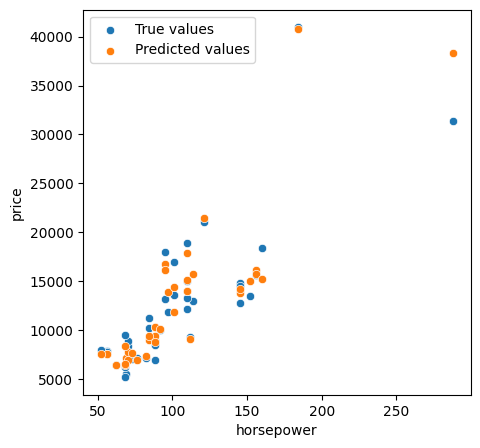

In [79]:
plt.figure(figsize=(5,5))

sns.scatterplot(x=X_red_test['horsepower'], y= y_test, label= 'True values')
sns.scatterplot(x=X_red_test['horsepower'], y= y_pred, label= 'Predicted values')

In [81]:
scores= []

for i in range(2,5):

    best_params = {'learning_rate': 0.06916623777071992, 'depth': 6, 
                   'subsample': 0.05773845817555169, 'colsample_bylevel': 0.8928937439525925, 'min_data_in_leaf': 24} 

    polinomial_degree = i

    pipeline = Pipeline([('scaler', StandardScaler()), ('pol_features', PolynomialFeatures(degree=polinomial_degree)) ,('Model', CatBoostRegressor(verbose=0, **best_params))])
    pipeline.fit(X_red_train, y_train)

    y_pred = pipeline.predict(X_red_test)

    score = r2_score(y_test, y_pred)
    scores.append(score)

    print(f'Plinomial degree: {i}, R^2 score: {score}')

Plinomial degree: 2, R^2 score: 0.9243190692692447
Plinomial degree: 3, R^2 score: 0.9188852557584428
Plinomial degree: 4, R^2 score: 0.918273384339545


Summary:  
Best estimator: CatboostRegressor   
Features: - curbweight	- enginesize	-horsepower  
Polinomial features: No  
Hyperparameters: {'learning_rate': 0.06916623777071992, 'depth': 6, 'subsample': 0.05773845817555169, 'colsample_bylevel': 0.8928937439525925, 'min_data_in_leaf': 24}  
R^2 score: 0.9311628720913862